In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split ,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pickle


In [4]:
df = pd.read_csv('dataset1.csv')

In [5]:
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [6]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [7]:
df.shape

(366, 12)

In [8]:
df.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
df.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    0
windspeed                 0
dtype: int64

In [11]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [12]:
df.columns= df.columns.str.strip()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            365 non-null    int64  
 1   pressure       365 non-null    float64
 2   maxtemp        365 non-null    float64
 3   temparature    365 non-null    float64
 4   mintemp        365 non-null    float64
 5   dewpoint       365 non-null    float64
 6   humidity       365 non-null    int64  
 7   cloud          365 non-null    int64  
 8   rainfall       365 non-null    object 
 9   sunshine       365 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 37.1+ KB


In [14]:
df = df.drop(columns = ['day'])

In [15]:
df.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [29]:
df['winddirection'].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
       160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [31]:
 df['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [33]:
df['rainfall']=df['rainfall'].map({'yes':1,'no':0})

In [35]:
df['rainfall'].unique()

array([1, 0], dtype=int64)

In [37]:
sns.set(style = 'whitegrid')

In [39]:
df.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,1013.764658,26.176164,23.735068,21.881644,19.973425,80.161644,71.106849,0.679452,4.413699,101.506849,21.536986
std,6.409697,5.979563,5.635701,5.596385,5.997768,10.071648,21.824024,0.467328,3.938285,81.723724,10.069712
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.800000,17.100000,16.100000,75.000000,58.000000,0.000000,0.500000,40.000000,13.700000
50%,1013.000000,27.700000,25.400000,23.700000,21.900000,80.000000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.500000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.900000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [41]:
df.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

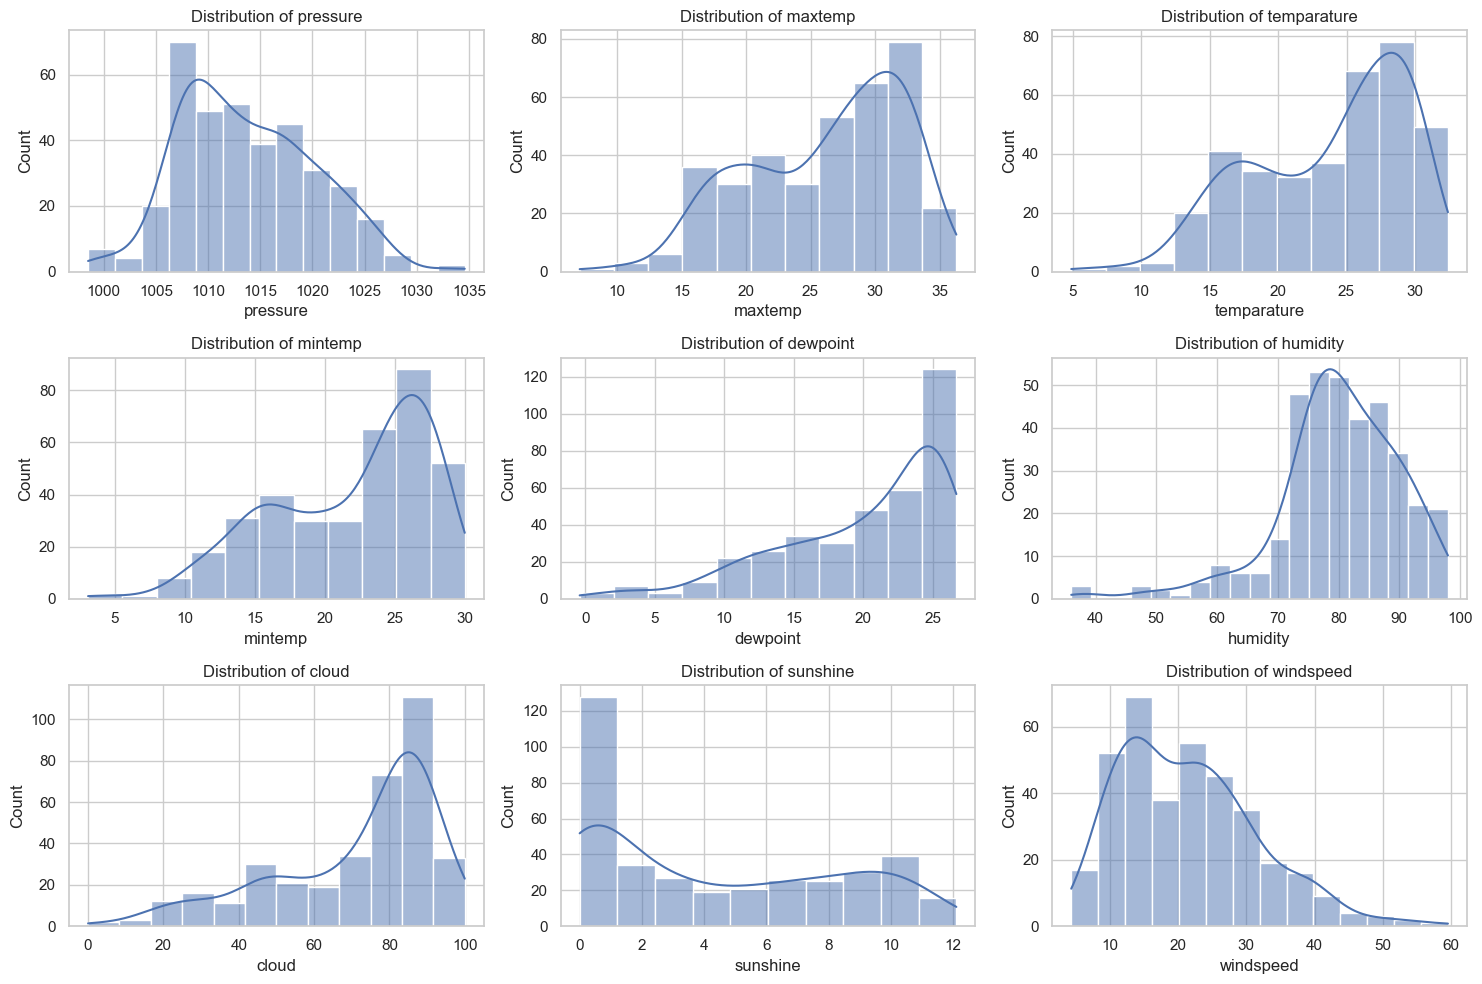

In [45]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud','sunshine' , 'windspeed'],1):
    plt.subplot(3,3,i)
    sns.histplot(df[column],kde = True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()
     

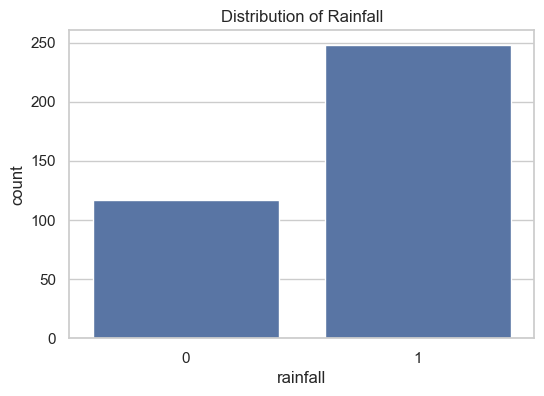

In [49]:
plt.figure(figsize = (6,4))
sns.countplot(x="rainfall",data = df)
plt.title("Distribution of Rainfall")
plt.show()

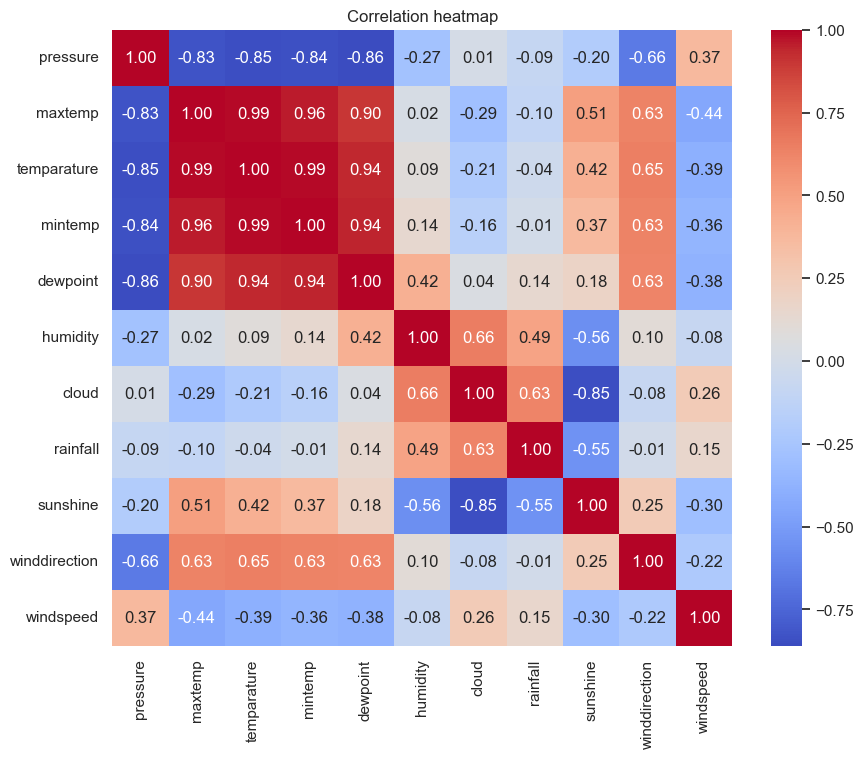

In [57]:
# correlation matrix
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot = True,cmap ="coolwarm",fmt = ".2f")
plt.title("Correlation heatmap")
plt.show()


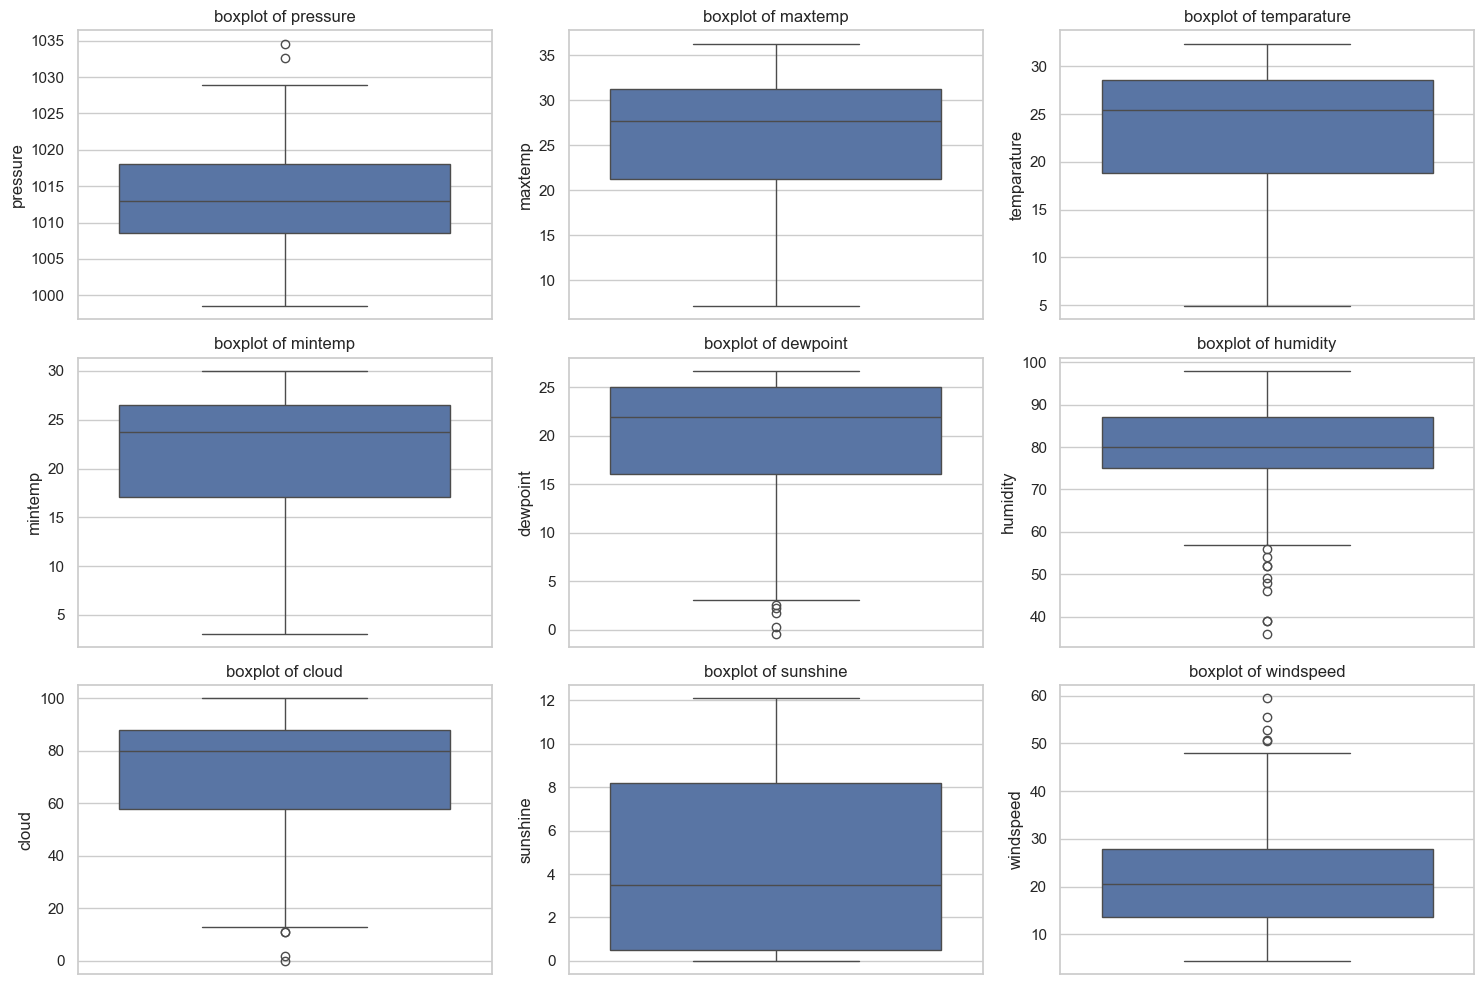

In [61]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud','sunshine' , 'windspeed'],1):
    plt.subplot(3,3,i)
    sns.boxplot(df[column])
    plt.title(f"boxplot of {column}")
plt.tight_layout()
plt.show()

In [63]:
#data preprocessing

In [65]:
df = df.drop(columns = ['maxtemp','temparature','mintemp'])

In [67]:
df.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [69]:
# separate majoritiy and minority

In [73]:
print(df["rainfall"].value_counts())

rainfall
1    248
0    117
Name: count, dtype: int64


In [77]:
df_majority = df[df["rainfall"] == 1]
df_minority = df[df["rainfall"] == 0]

In [79]:
print(df_majority.shape)
print(df_minority.shape)

(248, 8)
(117, 8)


In [87]:
df_majority_downsampled = resample(df_majority ,replace = False, n_samples = len(df_minority),random_state = 42)

In [89]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [91]:
df_downsampled.shape

(234, 8)

In [93]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
50,1023.2,9.6,67,55,1,5.9,20.0,23.9
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
264,1008.6,23.8,81,88,1,0.4,190.0,11.9
120,1012.2,18.7,80,89,1,0.3,60.0,27.0
224,1007.9,25.8,79,78,1,9.1,220.0,11.9


In [95]:
df_downsampled['rainfall'].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [97]:
#splitting the data into training data and test data

In [99]:
X = df_downsampled.drop(columns = ['rainfall'])
Y = df_downsampled['rainfall']

In [101]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [109]:
rf_model = RandomForestClassifier(random_state = 42)
param_grid_rf = {
    "n_estimators":[50,100,200],
    "max_features": ["sqrt","log2"],
    "max_depth":[None,10,20,30],
    "min_samples_leaf":[1,2,4]
}

In [111]:
grid_search_rf =GridSearchCV(estimator = rf_model,param_grid = param_grid_rf,cv=5,n_jobs= 1,verbose = 2)
grid_search_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_featu

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [113]:
best_rf_model = grid_search_rf.best_estimator_
print("best parameter for Random Forest:",grid_search_rf.best_params_)

best parameter for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 100}


In [115]:
#model Evaluation

In [117]:
cv_scores = cross_val_score(best_rf_model,X_train,Y_train,cv=5)
print("Cross-validation scores:",cv_scores)
print("Mean cross-validation:",np.mean(cv_scores))


Cross-validation scores: [0.76315789 0.78947368 0.7027027  0.83783784 0.78378378]
Mean cross-validation: 0.7753911806543385


In [119]:
Y_pred = best_rf_model.predict(X_test)
print("Test set Accuracy:",accuracy_score(Y_test,Y_pred))
print("Test set Confusion Matrix:\n",confusion_matrix(Y_test,Y_pred))
print("Classification Report:\n",classification_report(Y_test,Y_pred))

Test set Accuracy: 0.851063829787234
Test set Confusion Matrix:
 [[21  5]
 [ 2 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.86        26
           1       0.79      0.90      0.84        21

    accuracy                           0.85        47
   macro avg       0.85      0.86      0.85        47
weighted avg       0.86      0.85      0.85        47



## Prediction on unknown data

In [122]:
input_data = (1015.9,19.9,95,81,0.0,40.0,13.7)
input_df = pd.DataFrame([input_data],columns = ['pressure','dewpoint','humidity','cloud','sunshine','winddirection','windspeed'])

In [124]:
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [128]:
prediction = best_rf_model.predict(input_df)
print("Prediction result:","Rainfall" if prediction[0] == 1 else "No Rainfall") 

Prediction result: Rainfall
